In [4]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import random as rnd
%matplotlib inline

In [7]:
def predictor_Baseline():
    return rnd.random()

def predictor_Jaccard(Gx,i,j):
    j_temp = nx.jaccard_coefficient(Gx, [(i,j)])
    for u,v,p in j_temp:
        jaccard = p
    n = Gx.order()
    return jaccard + rnd.uniform(0,1/(10*n))

def predictor_DegreeProd(Gx,i,j):
    d_temp = nx.preferential_attachment(Gx, [(i,j)])
    for u,v,p in d_temp:
        degreeprod = p
    n = Gx.order()
    return degreeprod + rnd.uniform(0,1/(10*n))

def predictor_iforget(Gx,i,j):
    pass

def predictor_randomwalk(Gx,i,j):
    pass

def apply_Predictors(G,Y):
    nonedges = []
    for i in nx.nodes(G):
        for j in nx.nodes(G):
            if j>i and not G.has_edge(i,j):
                nonedges.append((i,j))
    ne = len(nonedges)
    
    dat = np.zeros([ne,6])
    for k,x in enumerate(nonedges):
        
        tau = (i,j) in Y
        baseline = predictor_Baseline()
        jaccard = predictor_Jaccard(G,x[0],x[1])
        degree = predictor_DegreeProd(G,x[0],x[1])
        
        dat[k,:] = [x[0],x[1],tau,baseline,jaccard,degree]
    return dat



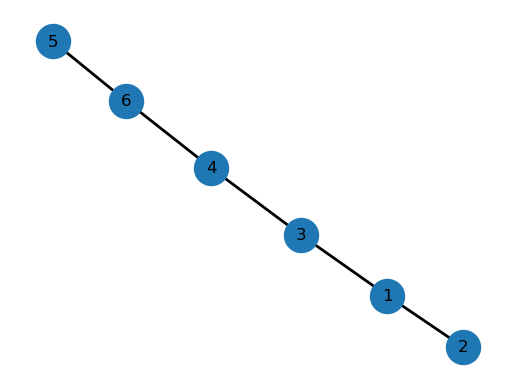

i,j : Tau(1=missing) : Baseline : Jaccard : Degree prod  
2.0,3.0 : 0.0 : 0.12126700881783103 : 0.5136790735436828 : 2.016157342484861  
4.0,5.0 : 0.0 : 0.8609296239512728 : 0.5113759404103668 : 2.004892997084571  
3.0,6.0 : 0.0 : 0.24151414172218189 : 0.3428575600452641 : 4.007447205028531  
1.0,4.0 : 0.0 : 0.87112506653511 : 0.3428450994065374 : 4.005232195000685  
3.0,5.0 : 0.0 : 0.9062436584815544 : 0.01362491733573566 : 2.0135494493757804  
1.0,6.0 : 0.0 : 0.8477747870162707 : 0.013426167493143888 : 4.001724286347691  
2.0,5.0 : 0.0 : 0.4244422132751 : 0.01293884424557741 : 1.0063934939541317  
2.0,6.0 : 0.0 : 0.4756219422232991 : 0.011795112617591535 : 2.012360867155763  
1.0,5.0 : 0.0 : 0.9396541629941374 : 0.01125628785174566 : 2.0046929655158356  
2.0,4.0 : 0.0 : 0.179127107740933 : 0.0010288251563447795 : 2.0064618276173105  


In [8]:
Go      = nx.Graph([(1,2),(1,3),(3,4),(5,6),(4,6)]) # observed graph Go, from Lecture 4
missing = [(2,3),(4,5)]                             # list of edges missing from Go

nx.draw_networkx(Go,with_labels=True,node_size=600,width=2) # draw it pretty
limits=plt.axis('off')                                                             # turn off axes
plt.show() 

####################################
##### do not modify above here #####

### YOUR CODE HERE

print("{},{} : {} : {} : {} : {}  ".format("i","j","Tau(1=missing)","Baseline","Jaccard","Degree prod"))
for y in sorted(apply_Predictors(Go,missing),key=lambda l:l[4],reverse=True):
    print("{},{} : {} : {} : {} : {}  ".format(y[0],y[1],y[2],y[3],y[4],y[5]))